In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv(r'advertising.csv')
df

    

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Defining Constant Data

In [4]:
choiceCategory="TV"
choiceRange = 300
yCategory="Sales"

In [5]:
# maxChoiceCategory = 0
# maxYCategory = 0
# a = np.array(df[choiceCategory])
# a.max()
# for i in range(len(df)):
#     df[choiceCategory][i]/=a.max()
# b = np.array(df[yCategory])
# b.max()
# for i in range(len(df)):
#     df[yCategory][i]/=b.max()
# df

# Scatter plot of the data chosen

Text(0, 0.5, 'Sales')

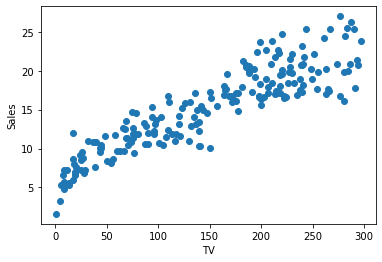

In [6]:
plt.scatter(df[choiceCategory],df[yCategory])
plt.xlabel(choiceCategory)
plt.ylabel(yCategory)

Calculating mean of both variables

In [7]:
x_mean = np.mean(df[choiceCategory])
y_mean = np.mean(df[yCategory])

x_mean, y_mean

(147.0425, 15.130500000000005)

Calculating B1(slope) 

In [8]:
dfx = df[choiceCategory]-x_mean
dfy = df[yCategory]-y_mean
dfx_sq = dfx*dfx
dfxy = dfx*dfy
dfxy_sum = dfxy.sum()
dfx_sq_sum = dfx_sq.sum()

B1 = dfxy_sum/dfx_sq_sum
B1

0.055464770469558854

In [9]:
y_sum = df[yCategory].sum()

x_sum = df[choiceCategory].sum()
count = df[yCategory].count()
B0 = (y_sum - B1*x_sum)/count
B0

6.974821488229894

# Calculating equation of the line of best fit

Text(0, 0.5, 'Sales')

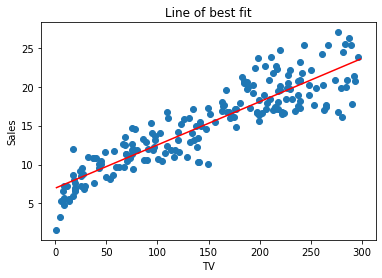

In [10]:
x = list(range(1,choiceRange))
x = np.array(x)
y = B0 + B1*x
plt.scatter(df[choiceCategory],df[yCategory])
plt.plot(x,y,'r')
plt.title("Line of best fit")
plt.xlabel(choiceCategory)
plt.ylabel(yCategory)

# Calculate Predicted charges for a specific person

In [11]:
def yPred(x):
    return int(B0 + B1*x)
    

In [12]:

print("Please tell the amount spent on advertising on",choiceCategory,"in millions")
userInput = float(input())
# yPredicted = int(B0 + B1*bmiInput)*max
yPredicted = yPred(userInput)
print("The sales will be around",yPredicted,"million units")


Please tell the amount spent on advertising on TV in millions



ValueError: could not convert string to float: ''

# karl pearson coeff.

In [33]:
XY = df[choiceCategory]* df[yCategory]
XYSum = XY.sum()
N = len(df[yCategory])
Num = (N*XYSum) - (df[yCategory].sum()*df[choiceCategory].sum())
Num

16271356.149999991

In [34]:
Xsum2 = (df[choiceCategory]**2).sum()
Ysum2 = (df[yCategory]**2).sum()
X2 = df[choiceCategory].sum()
Y2 = df[yCategory].sum()
Den = math.sqrt((N*Xsum2) - X2)* math.sqrt((N*Ysum2) - Y2)
Den

109038468.27797925

In [35]:
r = Num/Den
r

0.14922583201112385

# SST

In [36]:
sst = (dfy**2).sum()
sst

5555.98395

# SSE

In [37]:
sse=0
for i in range(len(df[choiceCategory])):
      sse +=(df[yCategory][i] - yPred(df[choiceCategory][i]))**2
sse

1097.9899999999998

# SSR

In [38]:
ssr = sst - sse
ssr

4457.99395

# R Square

In [39]:
R2 = ssr/sst
R2

0.8023770389041531

# Standard Error of Estimate

In [40]:
see = math.sqrt(sse/N-1)
see

2.118950211779408

# Linear Regression Using Inbuilt Library

In [41]:
from sklearn.linear_model import LinearRegression
x = df[choiceCategory].values.reshape(-1,1)
y = df[yCategory].values
model =LinearRegression().fit(x,y)
r_sq = model.score(x,y)
print('coefficient of determination:', r_sq)


coefficient of determination: 0.8121757029987414


In [42]:
print("According to our calculations", R2,)
print("According to inbuilt method",r_sq)


According to our calculations 0.8023770389041531
According to inbuilt method 0.8121757029987414


In [21]:
# df.corr()
